https://www.kaggle.com/datasets/erdemtaha/cancer-data

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('Cancer_Data.csv')

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df['labels'] = df['diagnosis'].map({'B': 0, 'M': 1})
df[['labels', 'diagnosis']]

,labels,diagnosis
0,1,M
1,1,M
2,1,M
3,1,M
4,1,M
...,...,...
564,1,M
565,1,M
566,1,M
567,1,M


In [12]:
df.corr()['labels'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

In [13]:
df.drop('diagnosis', axis = 1, inplace = True)

In [14]:
columns = list(df.columns)[0:-1]
columns

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [15]:
plt.rcParams['figure.max_open_warning'] = 40

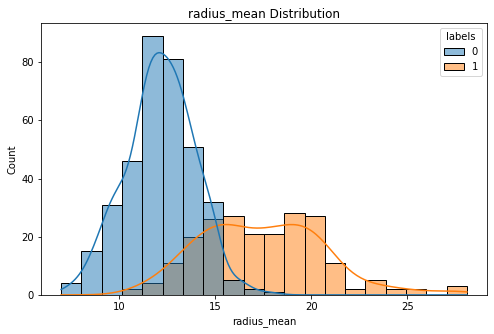

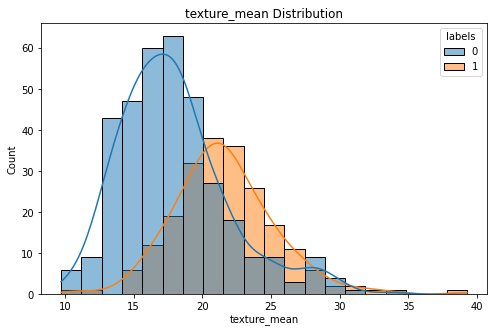

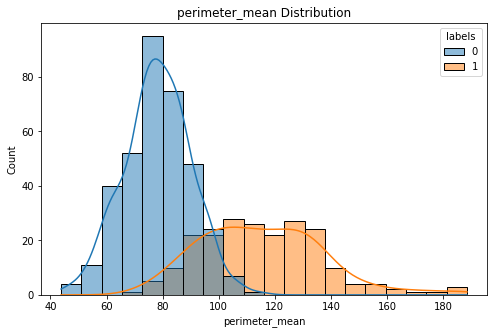

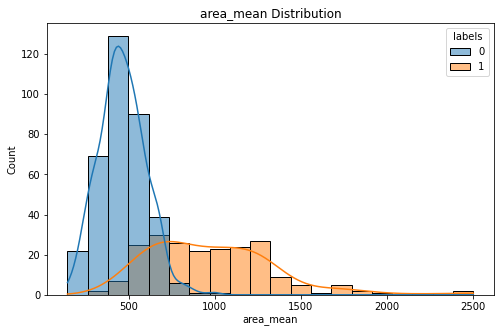

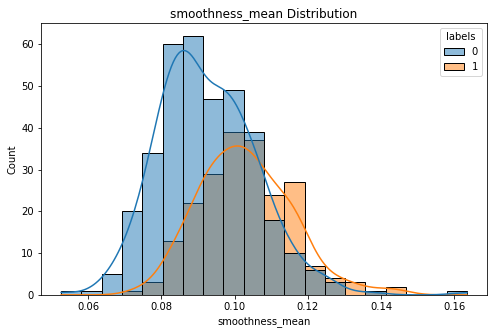

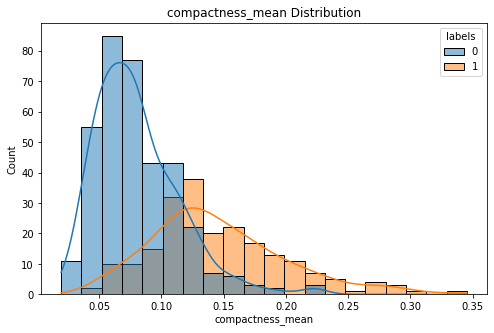

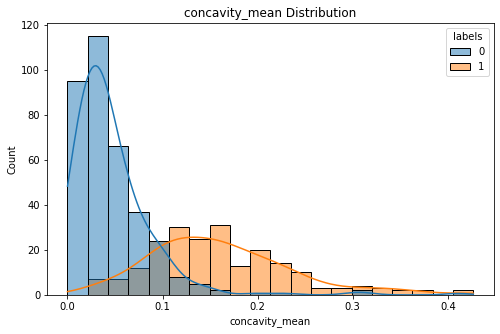

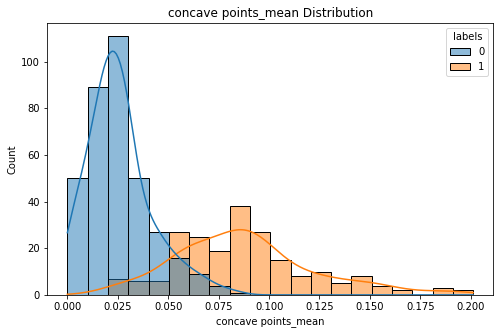

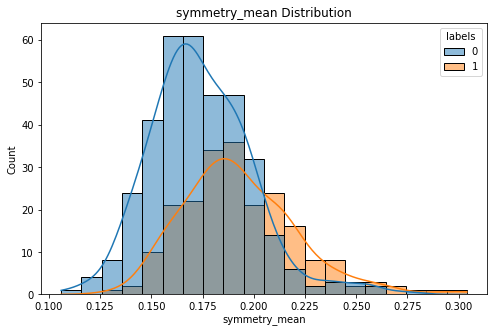

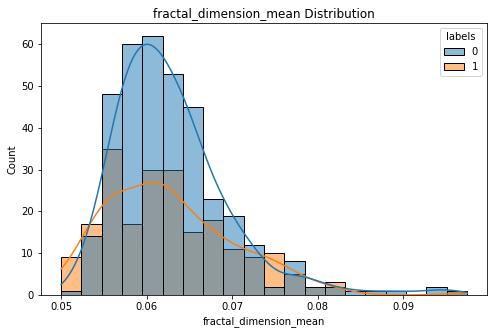

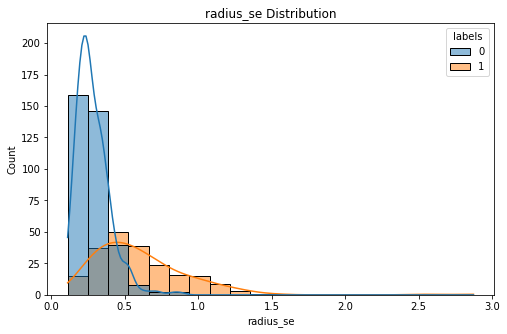

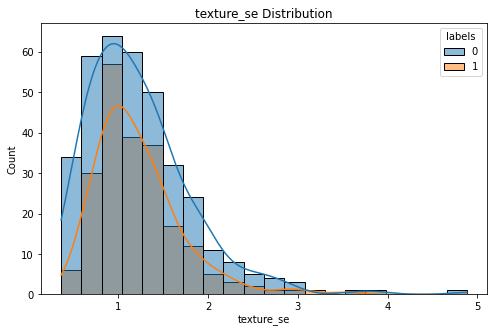

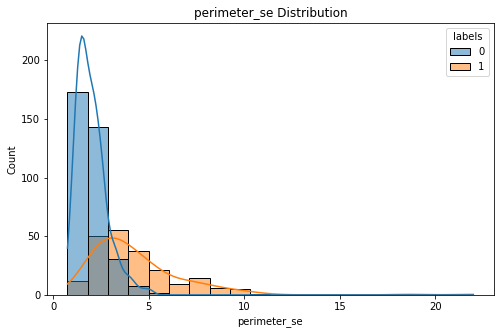

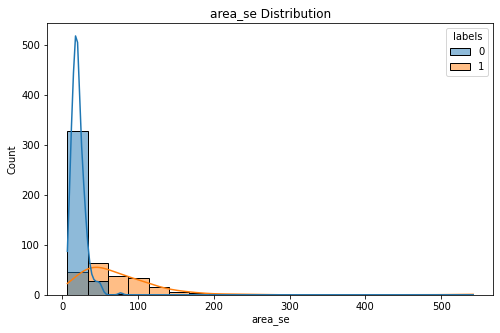

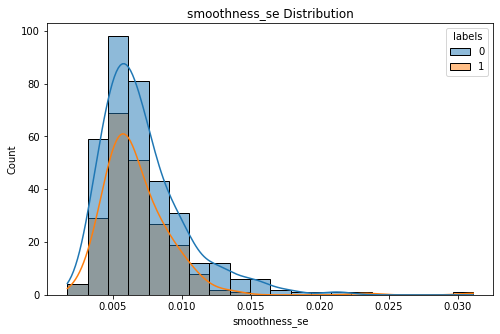

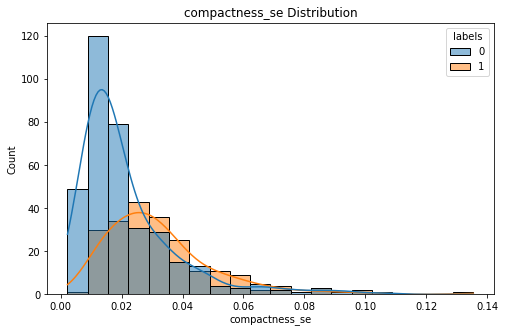

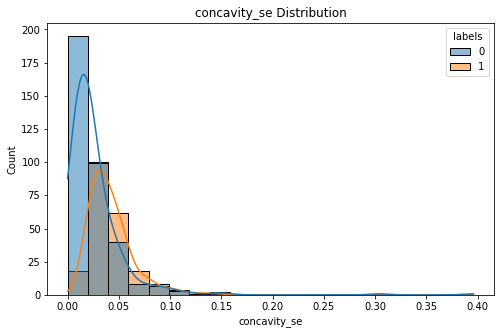

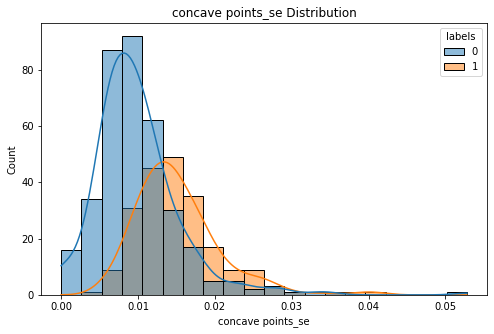

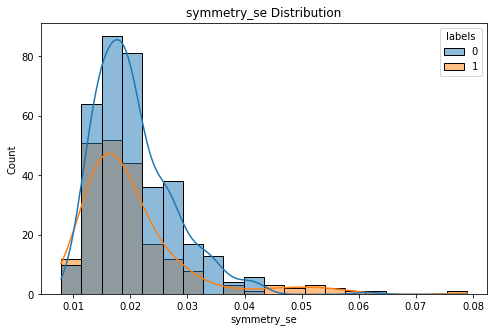

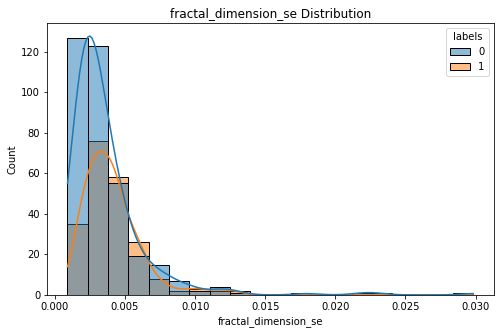

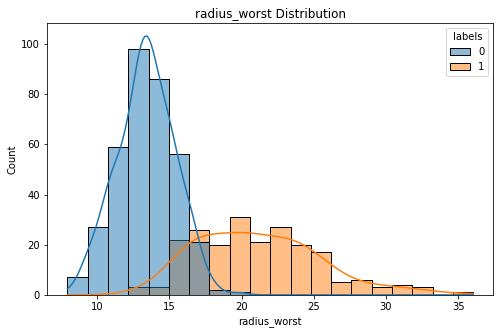

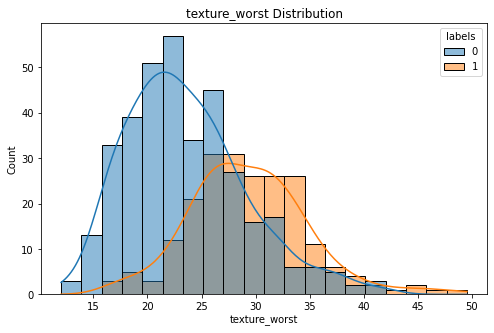

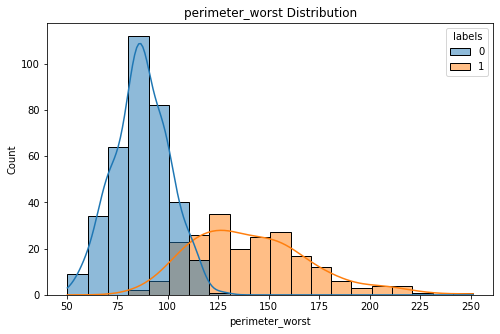

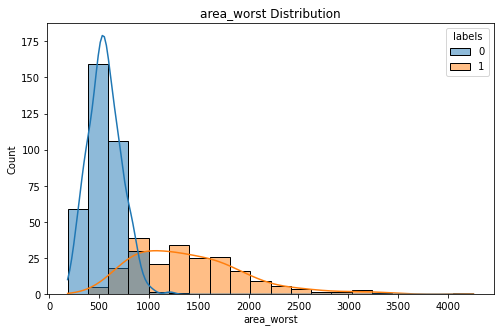

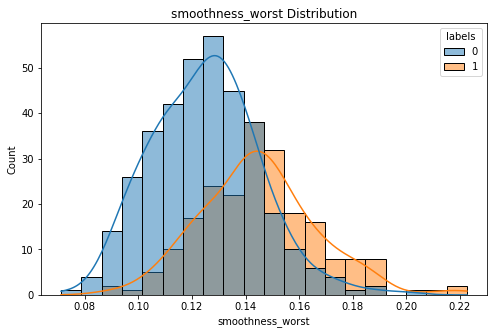

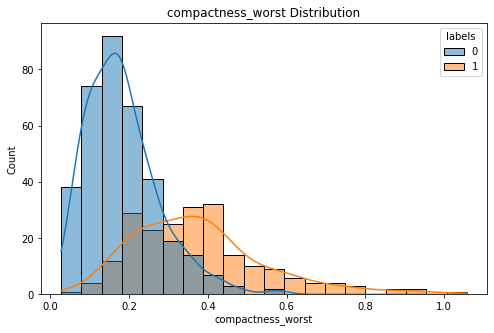

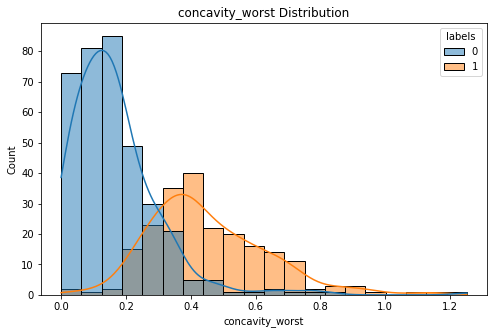

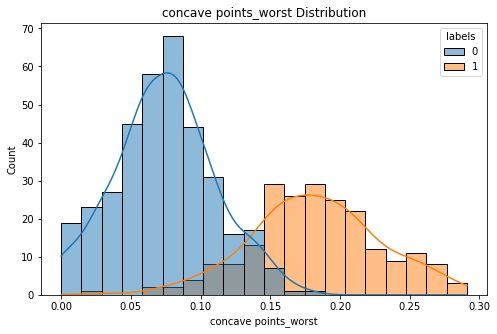

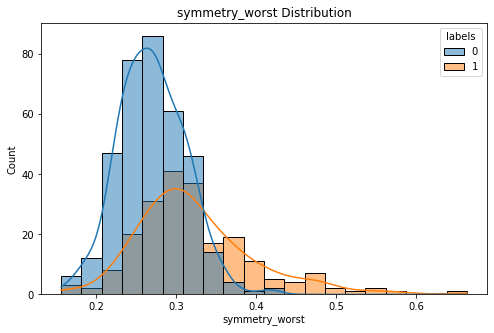

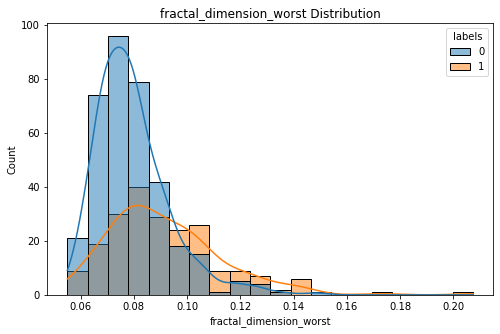

In [16]:
for column in columns:
    plt.figure(figsize = (8, 5))
    plt.title(f'{column} Distribution')
    sns.histplot(df, x = column, hue = 'labels', bins = 20, kde = True)

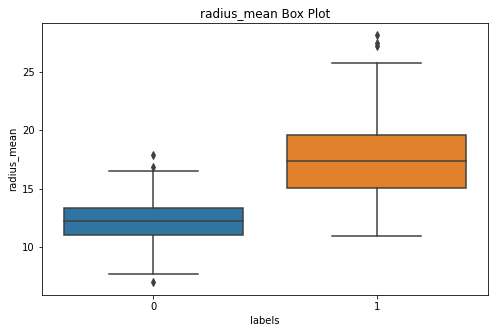

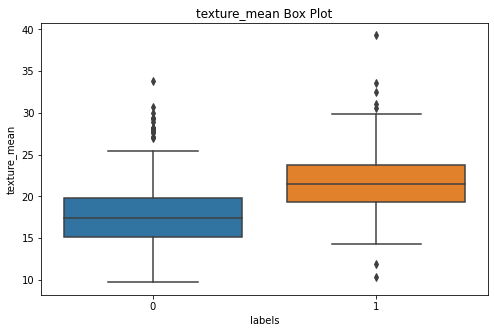

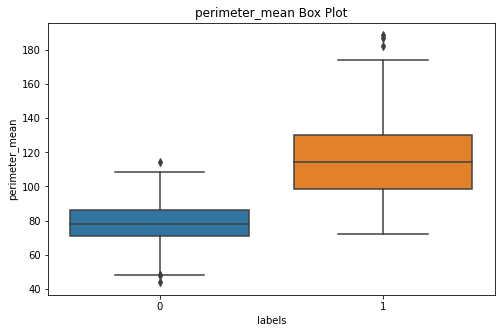

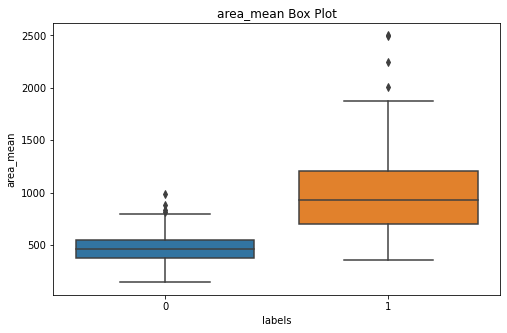

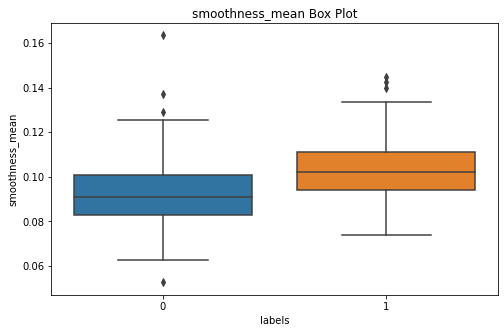

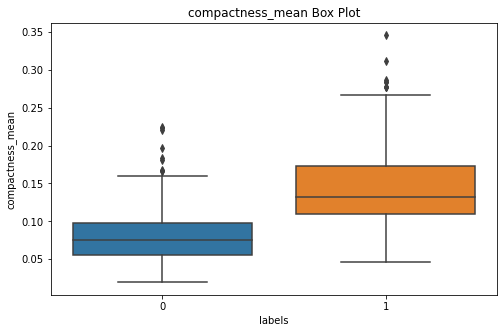

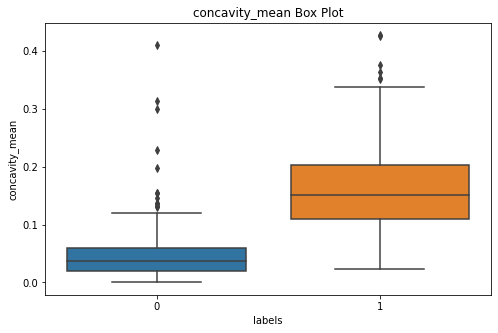

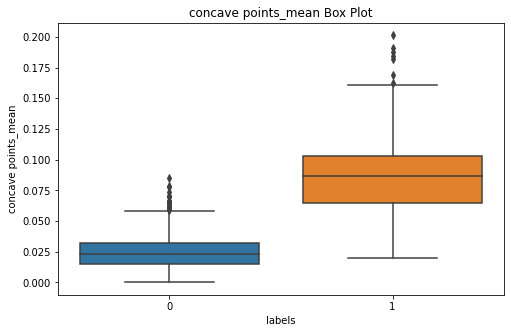

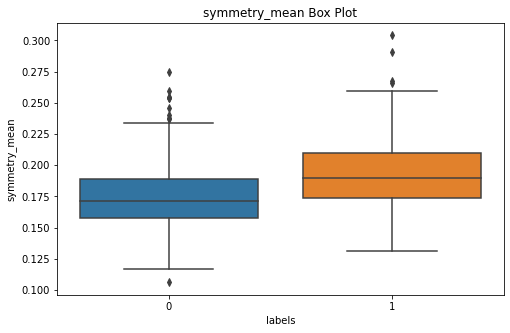

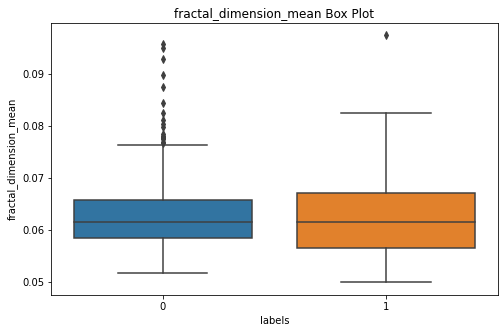

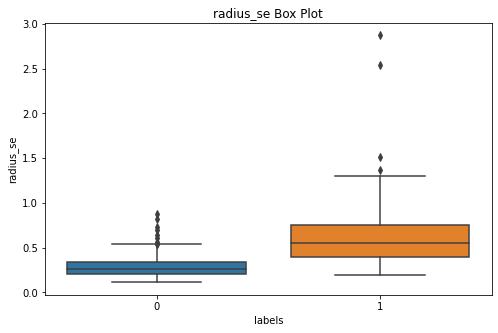

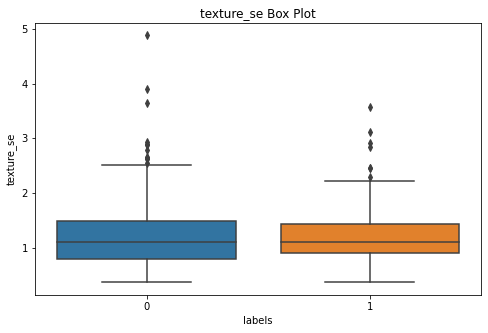

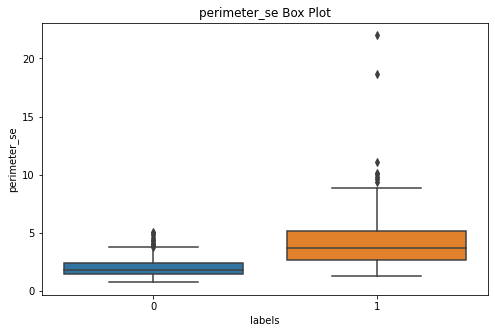

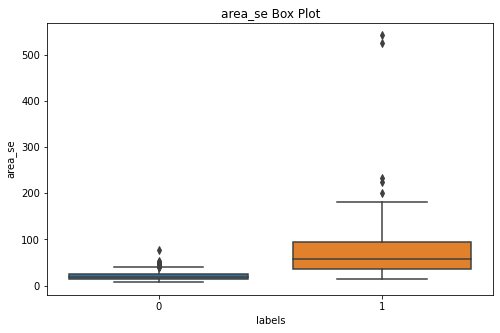

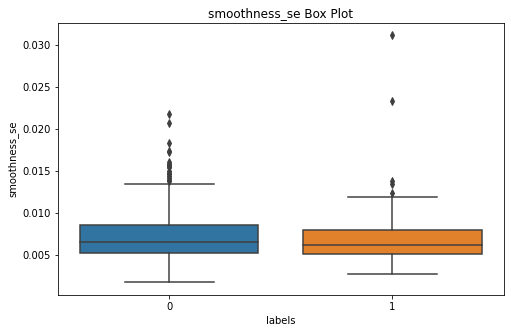

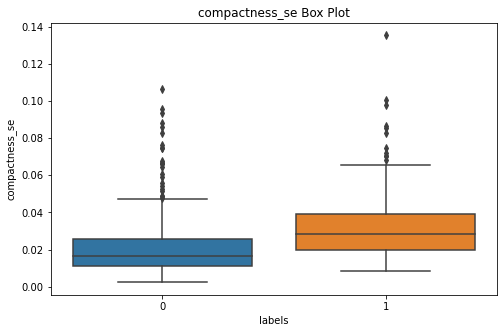

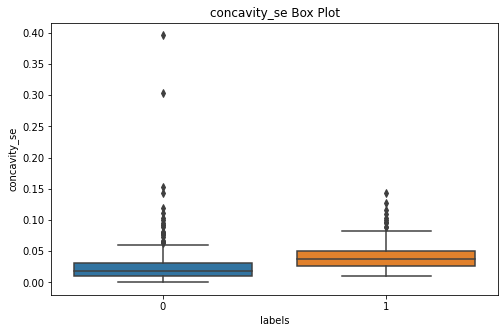

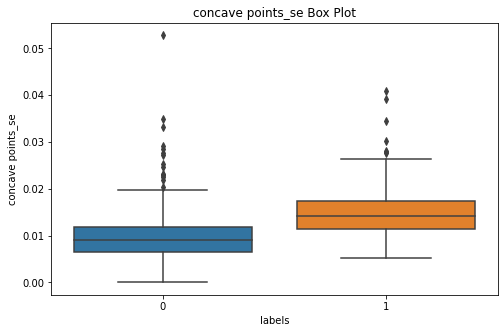

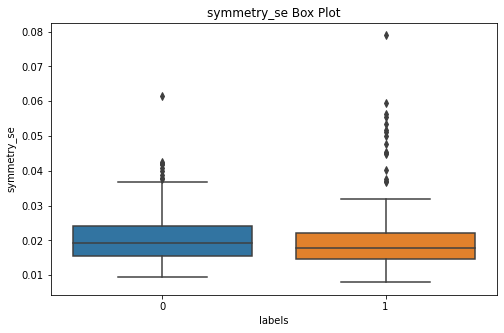

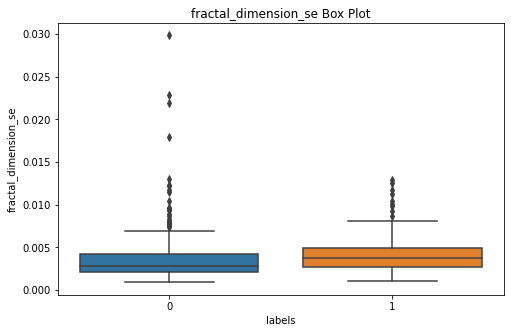

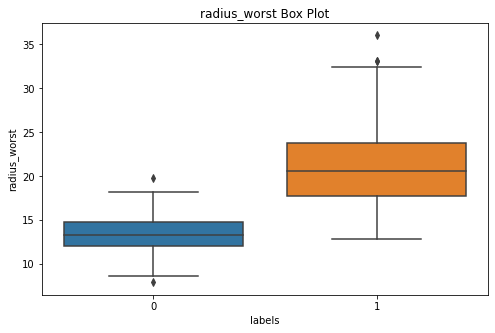

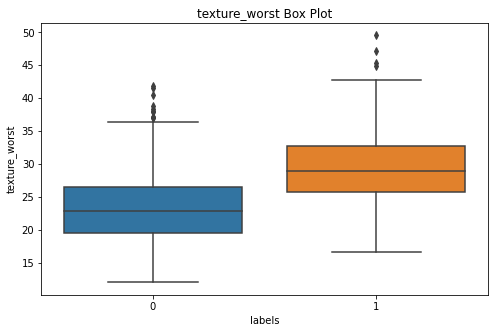

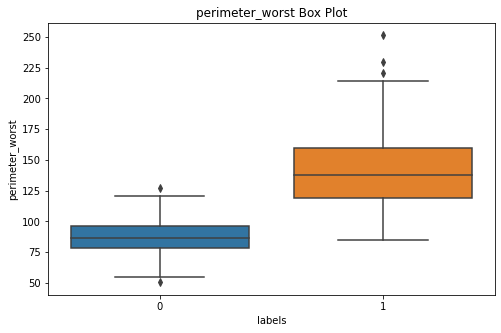

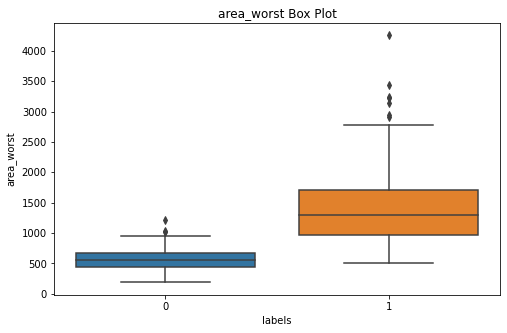

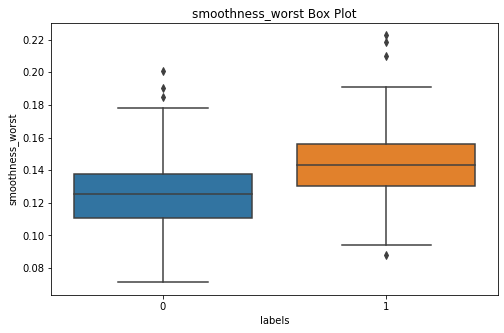

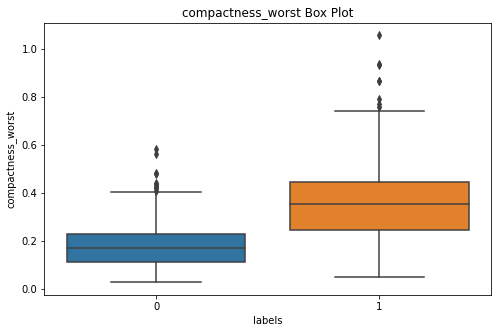

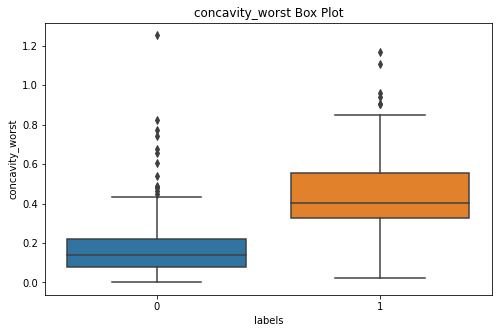

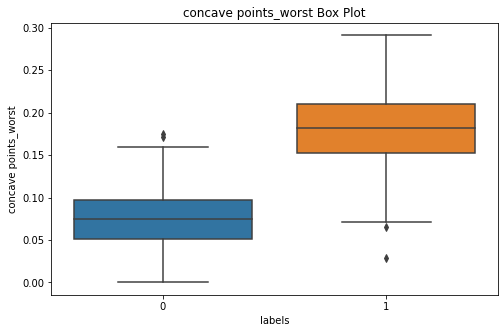

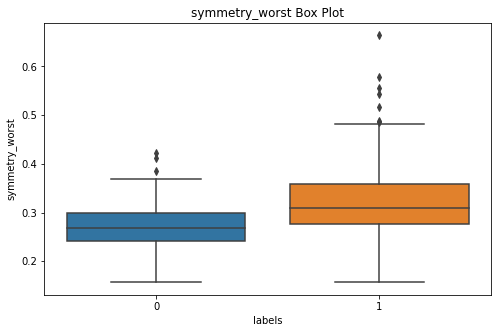

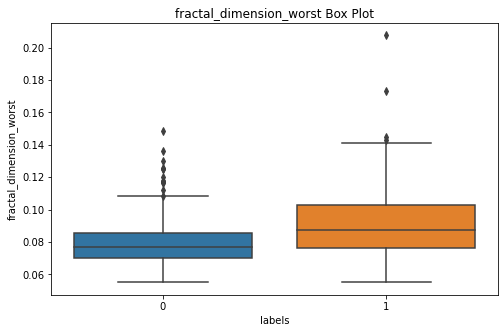

In [17]:
for column in columns:
    plt.figure(figsize = (8, 5))
    plt.title(f'{column} Box Plot')
    sns.boxplot(df, x = 'labels', y = column)

<Axes: title={'center': 'No. of Malignant Samples'}, xlabel='labels', ylabel='count'>

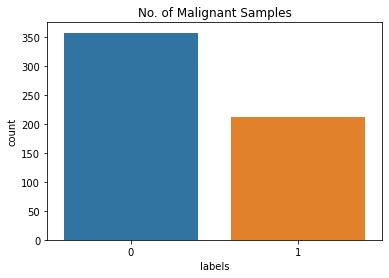

In [18]:
plt.title('No. of Malignant Samples')
sns.countplot(df, x = 'labels')

# Train-Test-Splitting, Modeling, Training, and Testing

### Without Scalers

In [19]:
def automate_model_train_test_display_results(models: list, X_train, y_train, X_test, y_test):
    for model in models:
        print(type(model).__name__)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print(confusion_matrix(y_test, predictions))
        print(classification_report(y_test, predictions))
        print("\n")

In [20]:
X = df.drop('labels', axis = 1)
y = df['labels']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [22]:
models = [
    SVC(),
    LogisticRegression(solver = 'lbfgs', max_iter = 2000),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

In [23]:
automate_model_train_test_display_results(
    models = models,
    X_train = X_train,
    y_train = y_train,
    X_test = X_test,
    y_test = y_test
)

SVC
[[88  3]
 [ 8 44]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        91
           1       0.94      0.85      0.89        52

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



LogisticRegression
[[85  6]
 [ 2 50]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        91
           1       0.89      0.96      0.93        52

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



DecisionTreeClassifier
[[87  4]
 [ 3 49]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        91
           1       0.92      0.94      0.93        52

    accuracy                           0.95       143
   macro avg       0.

### With MinMaxScaler

In [24]:
mms = MinMaxScaler()

In [25]:
models_2 = [
    SVC(),
    LogisticRegression(solver = 'lbfgs', max_iter = 2000),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

In [26]:
X_train_2 = mms.fit_transform(X_train)
X_train_2

array([[0.23896067, 0.26124567, 0.22320503, ..., 0.09608247, 0.11945594,
        0.10055096],
       [0.15093   , 0.15570934, 0.14345933, ..., 0.08862543, 0.39266706,
        0.16502689],
       [0.63083913, 0.57716263, 0.61578329, ..., 0.58316151, 0.31263552,
        0.16364948],
       ...,
       [0.25363245, 0.06539792, 0.24289959, ..., 0.36769759, 0.30455352,
        0.13695396],
       [0.32509821, 0.23633218, 0.30854813, ..., 0.17539519, 0.15750049,
        0.11006166],
       [0.65071702, 0.71764706, 0.63513233, ..., 0.57010309, 0.25684999,
        0.17801391]])

In [27]:
X_test_2 = mms.transform(X_test)
X_test_2

array([[0.4012968 , 0.05224913, 0.40570797, ..., 0.62783505, 0.32544845,
        0.30145612],
       [0.1113162 , 0.4       , 0.10517587, ..., 0.08810997, 0.17149616,
        0.12390135],
       [0.31752568, 0.19688581, 0.30440191, ..., 0.24010309, 0.34654051,
        0.14410337],
       ...,
       [0.37289981, 0.22698962, 0.35312003, ..., 0.27391753, 0.18923714,
        0.08677686],
       [0.07747645, 0.04878893, 0.07290443, ..., 0.15185567, 0.32623694,
        0.23101141],
       [0.77093095, 0.40346021, 0.74846244, ..., 0.80618557, 0.39897497,
        0.24157156]])

In [28]:
automate_model_train_test_display_results(
    models = models_2,
    X_train = X_train_2,
    y_train = y_train,
    X_test = X_test_2,
    y_test = y_test
)

SVC
[[87  4]
 [ 0 52]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        91
           1       0.93      1.00      0.96        52

    accuracy                           0.97       143
   macro avg       0.96      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143



LogisticRegression
[[91  0]
 [ 1 51]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        91
           1       1.00      0.98      0.99        52

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



DecisionTreeClassifier
[[83  8]
 [ 3 49]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        91
           1       0.86      0.94      0.90        52

    accuracy                           0.92       143
   macro avg       0.

### With Standard Scaler

In [29]:
ss = StandardScaler()

In [30]:
models_3 = [
    SVC(),
    LogisticRegression(solver = 'lbfgs', max_iter = 2000),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

In [31]:
X_train_3 = mms.fit_transform(X_train)
X_train_3

array([[0.23896067, 0.26124567, 0.22320503, ..., 0.09608247, 0.11945594,
        0.10055096],
       [0.15093   , 0.15570934, 0.14345933, ..., 0.08862543, 0.39266706,
        0.16502689],
       [0.63083913, 0.57716263, 0.61578329, ..., 0.58316151, 0.31263552,
        0.16364948],
       ...,
       [0.25363245, 0.06539792, 0.24289959, ..., 0.36769759, 0.30455352,
        0.13695396],
       [0.32509821, 0.23633218, 0.30854813, ..., 0.17539519, 0.15750049,
        0.11006166],
       [0.65071702, 0.71764706, 0.63513233, ..., 0.57010309, 0.25684999,
        0.17801391]])

In [32]:
X_test_3 = mms.transform(X_test)
X_test_3

array([[0.4012968 , 0.05224913, 0.40570797, ..., 0.62783505, 0.32544845,
        0.30145612],
       [0.1113162 , 0.4       , 0.10517587, ..., 0.08810997, 0.17149616,
        0.12390135],
       [0.31752568, 0.19688581, 0.30440191, ..., 0.24010309, 0.34654051,
        0.14410337],
       ...,
       [0.37289981, 0.22698962, 0.35312003, ..., 0.27391753, 0.18923714,
        0.08677686],
       [0.07747645, 0.04878893, 0.07290443, ..., 0.15185567, 0.32623694,
        0.23101141],
       [0.77093095, 0.40346021, 0.74846244, ..., 0.80618557, 0.39897497,
        0.24157156]])

In [33]:
automate_model_train_test_display_results(
    models = models_3,
    X_train = X_train_3,
    y_train = y_train,
    X_test = X_test_3,
    y_test = y_test
)

SVC
[[87  4]
 [ 0 52]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        91
           1       0.93      1.00      0.96        52

    accuracy                           0.97       143
   macro avg       0.96      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143



LogisticRegression
[[91  0]
 [ 1 51]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        91
           1       1.00      0.98      0.99        52

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



DecisionTreeClassifier
[[83  8]
 [ 4 48]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        91
           1       0.86      0.92      0.89        52

    accuracy                           0.92       143
   macro avg       0.